In [67]:
#  pip install imageai
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
from sklearn import model_selection

In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn

import matplotlib.pyplot as plt
# from sklearn.preprocessing import imputer

bankdata = pd.read_csv(r'C:\Users\jaffe\Desktop\banknote.csv')
bankdata.head()
x = bankdata.drop(columns=['Class'])
y = bankdata['Class']
svc = sklearn.svm.SVC()
# impute = imputer.fit(x[:,1:3])
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=2)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = accuracy_score(y_test, predictions)
score

0.9818181818181818

In [ ]:
bankdata.head()
bankdata.sample(10)

In [ ]:
print(bankdata.shape)
print(bankdata.describe())

In [ ]:
# class distribution
bankdata.groupby('Class').size()

In [ ]:
# bankdata.plot(kind = 'box', subplots = True, layout = (2,2), sharex= False, sharey = False)
# plt.show()

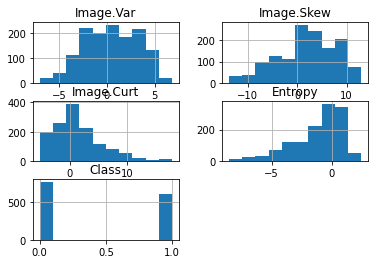

In [10]:
bankdata.hist()
plt.show()

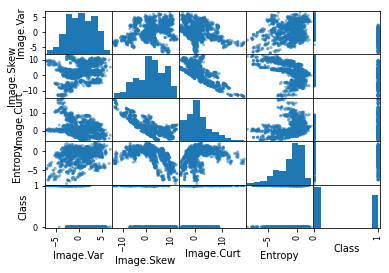

In [14]:
scatter_matrix(bankdata)
plt.show()

In [46]:
models =[]
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train, y_train,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s %sf (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)


LR 0.990884070058382f (0.007063)
CART 0.9808590492076732f (0.010336)
KNN 1.0f (0.000000)
LDA 0.9763219349457882f (0.014179)
NB 0.8441451209341118f (0.026696)
SVM 0.9981734778982487f (0.003653)


In [42]:
# KNeighbor
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       132

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



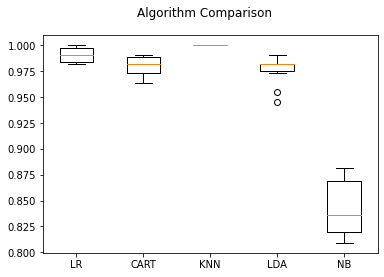

In [41]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
# SVM
SVM = SVC()
SVM.fit(x_train,y_train)
predictions = SVM.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.9890909090909091
[[140   3]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       143
           1       0.98      1.00      0.99       132

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



[]

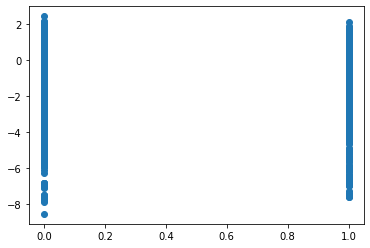

In [66]:
fig = plt.figure()
plt.scatter(bankdata.Class, bankdata.Entropy)
plt.plot()

In [51]:
# Decisiontreeclassifier
CART = DecisionTreeClassifier()
CART.fit(x_train,y_train)
predictions = CART.predict(x_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

0.9781818181818182
[[138   5]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       143
           1       0.96      0.99      0.98       132

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275

